In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
x=np.linspace(-5.0,5.0,100)
y=np.sqrt(10**2-x**2)
y=np.hstack([y,-y])
x=np.hstack([x,-x])

In [3]:
x1=np.linspace(-5.0,5.0,100)
y1=np.sqrt(5**2-x1**2)
y1=np.hstack([y1,-y1])
x1=np.hstack([x1,-x1])

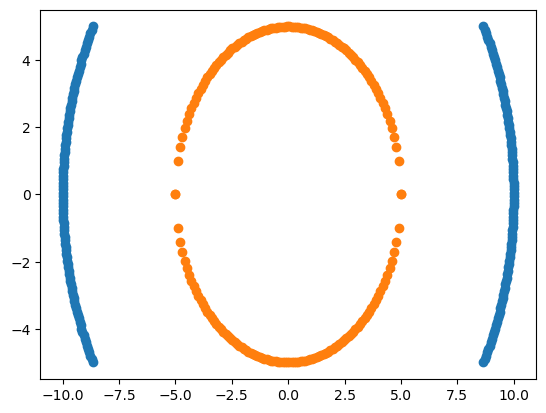

In [4]:
plt.scatter(y,x)
plt.scatter(x1,y1)

In [5]:
df1=pd.DataFrame(np.vstack([y,x]).T,columns=['X1','X2'])
df1['Y']=0
df2=pd.DataFrame(np.vstack([y1,x1]).T,columns=['X1','X2'])
df2['Y']=1
df=df1.append(df2)
df.head(5)


/tmp/ipykernel_310/3102956401.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df1.append(df2)


,X1,X2,Y
0,8.660254,-5.00000,0
1,8.717792,-4.89899,0
2,8.773790,-4.79798,0
3,8.828277,-4.69697,0
4,8.881281,-4.59596,0


In [6]:
#polynomial kernel

In [8]:
df['X1_Sqaure']=df['X1']**2
df['X2_Square']=df['X2']**2
df['X1*X2']=df['X1']*df['X2']
df.head()

,X1,X2,Y,X1_Sqaure,X2_Square,X1*X2
0,8.660254,-5.00000,0,75.000000,25.000000,-43.301270
1,8.717792,-4.89899,0,75.999898,24.000102,-42.708375
2,8.773790,-4.79798,0,76.979390,23.020610,-42.096467
3,8.828277,-4.69697,0,77.938476,22.061524,-41.466150
4,8.881281,-4.59596,0,78.877155,21.122845,-40.818009


In [15]:
x=df[['X1_Sqaure','X2_Square','X1*X2']]

In [16]:
x

,X1_Sqaure,X2_Square,X1*X2
0,75.000000,25.000000,-43.301270
1,75.999898,24.000102,-42.708375
2,76.979390,23.020610,-42.096467
3,77.938476,22.061524,-41.466150
4,78.877155,21.122845,-40.818009
...,...,...,...
195,3.877155,21.122845,9.049671
196,2.938476,22.061524,8.051537
197,1.979390,23.020610,6.750316
198,0.999898,24.000102,4.898740


In [11]:
y=df['Y']
y

0      0
1      0
2      0
3      0
4      0
      ..
195    1
196    1
197    1
198    1
199    1
Name: Y, Length: 400, dtype: int64

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=30)

In [19]:
!pip install plotly

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 68.8 MB/s eta 0:00:0000:0100:01


In [40]:
import plotly.express as px
import plotly.express as px
fig=px.scatter_3d(df,x='X1_Sqaure',y='X2_Square',z='X1*X2',color='Y')
fig.show()
plt.show()

In [26]:
from sklearn.metrics import accuracy_score,classification_report
from sklearn.svm import SVC
svc=SVC(kernel='poly')
svc.fit(X_train,y_train)

SVC(kernel='poly')

In [28]:
y_pred=svc.predict(X_test)

In [30]:
print(accuracy_score(y_pred,y_test))
print(classification_report(y_pred,y_test))

1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        52
           1       1.00      1.00      1.00        48

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



In [31]:
#rbf

In [33]:
from sklearn.metrics import accuracy_score,classification_report
from sklearn.svm import SVC
svc=SVC(kernel='rbf')
svc.fit(X_train,y_train)

SVC()

In [34]:
y_pred=svc.predict(X_test)

In [35]:
print(accuracy_score(y_pred,y_test))
print(classification_report(y_pred,y_test))

1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        52
           1       1.00      1.00      1.00        48

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



In [36]:
#sigmoid

In [37]:
from sklearn.metrics import accuracy_score,classification_report
from sklearn.svm import SVC
svc=SVC(kernel='sigmoid')
svc.fit(X_train,y_train)

SVC(kernel='sigmoid')

In [38]:
y_pred=svc.predict(X_test)

In [39]:
print(accuracy_score(y_pred,y_test))
print(classification_report(y_pred,y_test))

0.8
              precision    recall  f1-score   support

           0       1.00      0.72      0.84        72
           1       0.58      1.00      0.74        28

    accuracy                           0.80       100
   macro avg       0.79      0.86      0.79       100
weighted avg       0.88      0.80      0.81       100

